# Question 1

Ideas that can be statistically examined and tested need to be measurable and based on observable data; if they can't be measured, then there is no way to statistically test them. And a good null hypothesis should be clear, specific and able to be tested empirically, usually showing that there is no effect or no difference between the groups.
The difference between the null hypothesis and the alternative hypothesis is that the null hypothesis assumes that there is no effect or relationship, whereas the alternative hypothesis suggests that there is a significant effect or relationship.

# Question 2

In a statistical test, we care the population, but because the amount of data is too large to measure (e.g., how to measure the specific health of each of the 300 million people in the U.S.?). So we often use data from a sample (a smaller group of people) to speculate about the population. Sample data points, sample mean, etc. are numbers obtained from samples, i.e. data about samples, and are called “sample statistics”. Let's say I want to know the average height of all the people in a country. But measuring everyone would take too much time and effort. So I select 100 people and measure their average height, and the result is the sample mean, which is one of the sample statistics. And what we actually need is the population parameter, such as the population mean (𝜇), which in the example is the true average height of everyone in the country. And when performing a statistical test, the sample mean can be used to make inferences or guesses about the population parameter (the true average height of everyone in the country). That is, we use the sample statistic to make a guess about the population parameter.

# Question 3

When calculating p-values, the phrase “imagine a world where the null hypothesis is true” means that we assume that there is no effect or no difference between the groups. We then look at how likely it is to observe our test statistic by chance under this assumption.

The relevance of the sampling distribution of the test statistic under the null hypothesis is the key here. p-value is the probability of observing the test statistic (or something more extreme) in this imaginary world where the null hypothesis is true. If this probability is very low (usually less than 0.05), it suggests that it is unlikely that the result we observe would occur by chance, leading us to question the null hypothesis.

# Question 4

The p-value is a metric used in hypothesis testing to determine the strength of evidence against the null hypothesis.

The smaller the p-value, the stronger the evidence to reject the null hypothesis.

When we conduct a hypothesis test, we test whether the observed data match the hypothesis that the null hypothesis holds. If the null hypothesis exists, the p-value tells us how likely it is to see the observed data or a more extreme scenario.

The smaller the p-value, the less likely it is to see the observed data if the null hypothesis exists. Make it seem less plausible or absurd

# Question 5

H0: The proportion of couples who tilt their heads to the right is 0.5

The sample mean is the observed proportion of couples tilting their heads to the right in the sample of 124 couples. Which is 64.5%.

The population parameter is the true proportion of all couples who tilt their heads to the right in the entire population. According to  H0, it is 50%

In [6]:
import numpy as np


observed_right_tilts = 80
total_couples = 124
num_trials = 10000

simulated_right_tilts = np.random.binomial(total_couples, 0.5, num_trials)

p_value = np.mean(simulated_right_tilts >= observed_right_tilts)

p_value


0.0004

Since 0.001 > 0.0004, There Very strong evidence against the null hypothesis

# Question 6

A smaller p-value does not definitively prove that the null hypothesis is false; it simply indicates that the evidence against the null hypothesis is stronger. In hypothesis testing, we set a significance level to decide whether to reject the null hypothesis. If the p-value is below this level, we reject the null hypothesis, but do not prove that it is false.

Regarding Fido's guilt or innocence, the p-value does not definitively prove either way. A low p-value may indicate that there is enough evidence against Fido to reject the null hypothesis of innocence, but it does not prove his guilt. Conversely, a high p-value indicates that there is insufficient evidence to reject the null hypothesis of innocence, but does not prove guilt.

There is no particular p-value that definitively proves innocence or guilt; even a small p-value would only indicate that the evidence against the null hypothesis is strong, as would a large p-value.

# Question 7

In [37]:
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

patient_data['HealthScoreChange'] = patient_data.FinalHealthScore - patient_data.InitialHealthScore

observed_statistic = (patient_data.HealthScoreChange > 0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

# Change: Adjust to one-tailed test
# For one-tailed test (looking for increases), we only check if simulated statistics are greater than or equal to the observed statistic.
SimStats_as_or_more_extreme_than_ObsStat = simulated_statistics >= observed_statistic

p_value = (SimStats_as_or_more_extreme_than_ObsStat).sum() / number_of_simulations
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under H0)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")


Number of Simulations: 10000

Number of simulated statistics (under H0)
that are "as or more extreme" than the observed statistic: 565

p-value
(= simulations "as or more extreme" / total simulations): 0.0565


### Changes in code:

From "abs(simulated_statistics - population_parameter_value_under_H0) >= abs(observed_statistic - population_parameter_value_under_H0) (which checks both sides of the distribution)"

To "simulated_statistics >= observed_statistic" (which only checks the upper tail).

### Changes in interpretation of the hypothesis test:

Null hypothesis: no positive change in health scores occurs.

Alternative hypothesis: there is a positive change in health scores

Since only one tail was examined, the assumption changed from: whether a change occurred” to ‘whether a positive change occurred’.

### P-value
In general, a one-tailed p-value should be smaller than a two-tailed p-value.

This is because a one-tailed test only considers extremes in one direction, whereas a two-tailed test considers extremes in both directions. Therefore, a significant result in one direction may appear less significant in a two-tailed context because it is split into two tails.

# Question 8

### Problem introduction
#### Relationship between this experiment and the original with Fisher and Bristol
This analysis is based on Fisher's famous Tea Tasting Experiment in which Dr. Muriel Bristol claimed that she could tell whether milk or tea was poured into a cup first. A similar experiment was conducted with 80 students in STA130 to test whether they could correctly identify whether tea or milk was poured first. The most obvious difference between the two experiments was the sample size, which in Fisher's case was 8 cups of tea, whereas in this case it was 80 students (80 cups of tea). In addition, the nature is different as well; Fisher's experiment was Dr. Bristol tasting 8 cups of tea alone, which implies that the experiment was more individualized. Whereas the current experiment was 80 students each tasting a cup of tea, the parameters were more abstract and would not depend on one person's sensitivity to flavor.

#### Null Hypothesis(H0): 
The probability of correctly identifying the pouring order is 0.5 (The students do not have any special ability to distinguish the order of pouring, they are just guessing)

#### Alternative Hypothesis(H1):
The probability of correctly identifying the pouring order is greater than 0.5 (the students have some ability to tell the difference.)

### Quantitative Analysis
I will use a binomial test to assess the validity of the null hypothesis.

In [10]:
import numpy as np
from scipy.stats import binomtest

np.random.seed(10000)

n_students = 80
n_correct = 49
p_guessing = 0.5  # under H₀

result = binomtest(n_correct, n_students, p=p_guessing, alternative='greater')

p_value = result.pvalue
p_value

0.028332213172560572

### Findings and Discussion
By binomial test, the p-value is 0.028, which according to the table given in question 5, 0.05 > 0.028 > 0.01, which means that there is Moderate evidence against the null hypothesis. therefore from the hypothesis test, there is indeed evidence to support the rejection of H0, thus accept H1, inferring that STA130 students may have the ability to distinguish between the order of pouring milk and tea.

# Question 9

YES

# Summary by ChatGPT

### 1
The conversation is about explaining the difference between sample statistics and population parameters in a simple way. You want to understand how sample data, like the average from a small group, helps us infer something about the larger population. When performing statistical tests, we calculate values from the sample but use those to make educated guesses about the true values in the entire population. The key idea is that the result of these tests applies to the population, not just the sample, because our goal is to learn about the population as a whole.

### 2
In this conversation, we explored a study by Güntürkün (2003) that found 64.5% of couples tilted their heads to the right while kissing. We simulated a p-value using a "50/50 coin-flipping" model to test the null hypothesis that there is no head tilt preference (i.e., a 50/50 chance of tilting left or right). After simulating 10,000 trials, we found a p-value of 0.0005, indicating that the observed data is unlikely to occur by random chance, suggesting a potential preference for rightward tilting when kissing.

### 3
A p-value cannot definitively prove that a hypothesis is true or false. A smaller p-value indicates stronger evidence against the null hypothesis but doesn't guarantee its falsity, and a higher p-value suggests insufficient evidence to reject the null, but it doesn't prove the null is true. In the case of Fido, a high p-value cannot definitively prove innocence, and a low p-value cannot definitively prove guilt. P-values provide evidence but not absolute proof.

### 4
In this conversation, you asked how to modify a hypothesis test code to compute a one-tailed p-value instead of a two-tailed one. The key change involved adjusting the condition that checks for extreme simulated statistics. In the original two-tailed test, both directions (above and below the observed statistic) were considered. For the one-tailed test, the condition was simplified to only check if the simulated statistics are greater than or equal to the observed statistic. This change narrows the focus to detecting an increase (one direction) and typically results in a smaller p-value compared to the two-tailed test.

### 5
You asked to perform a binomial hypothesis test based on a tea-tasting experiment, similar to one conducted by Ronald Fisher. In this case, 80 students were asked to identify whether milk or tea was poured first, with 49 students giving the correct answer.

The null hypothesis (H₀) assumes that the students are randomly guessing, meaning they have a 50% chance of identifying the correct order (p = 0.5). The alternative hypothesis (H₁) suggests that the students are better than random guessing (p > 0.5). 

I provided Python code using `scipy.stats.binom_test` to calculate the p-value for the experiment, which would tell us the probability of obtaining 49 or more correct answers out of 80 if the students were simply guessing.

# ChatGPT History
1.https://chatgpt.com/share/6705f73e-c828-800b-a7d6-83775e9db83c

2.https://chatgpt.com/share/6705f74b-c8d0-800b-8815-e66b66ee7848

3.https://chatgpt.com/share/6705f757-7788-800b-bf3c-4bed966aa7cc

4.https://chatgpt.com/share/6705f763-e010-800b-8d41-6825b796f8e4

5.This chat I suddenly can't get the share link, don't know why
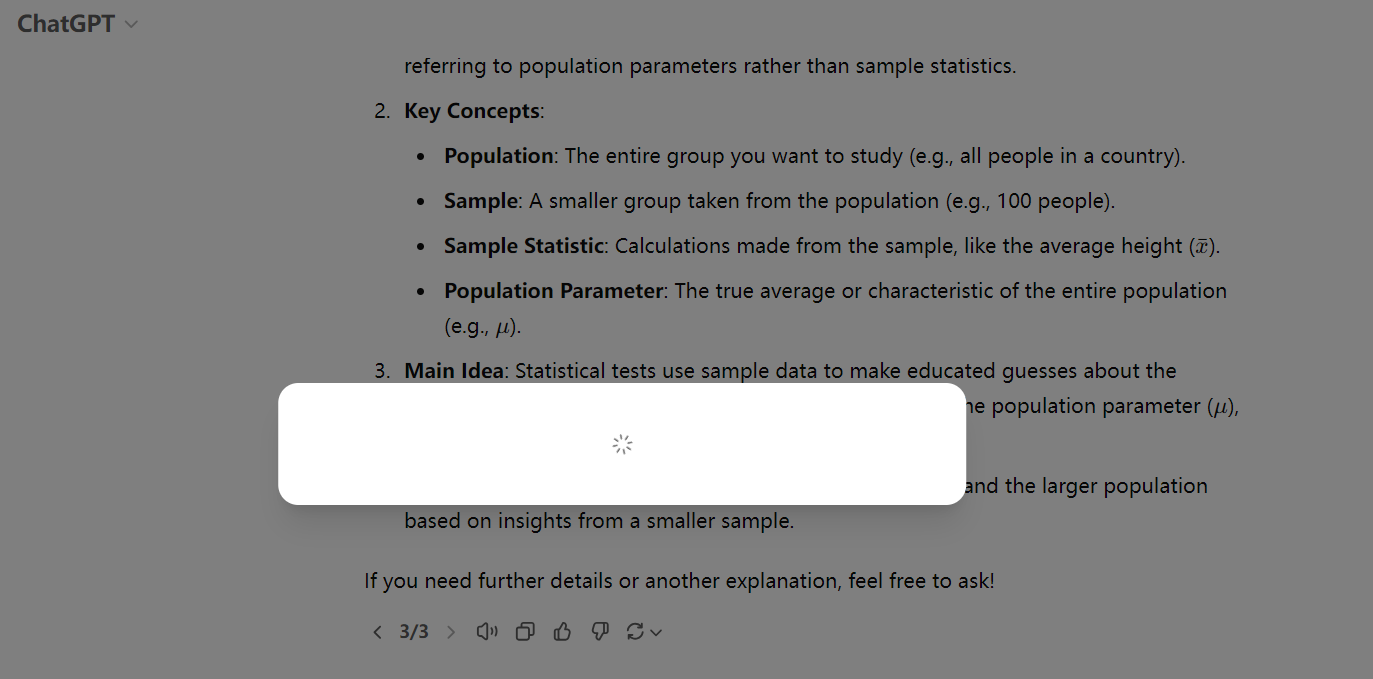